# Numerical Methods
## Problem 1 <br> Numerical errors in derivatives</h2>
In Lecture1, we have introduced the total numerical error in derivatives as <br>**E = Eacc+Eϵ**<br>,where Eacc is the error associated to the analytical Taylor expansion on the resolution step and Eϵ the error associated to the numerical precision. Check the lecture slides for the full expressions in
the case of central difference derivatives. In this exercise, your task is to do the same analysis for the forward difference derivative, which has an accuracy error of O(h), and the central difference second derivative, which is of O(h2). You should be able to derive all the formulas, including the Taylor expansions, by yourself (you can check literature for help). Plot the error total as a function of h (in full log-axis), for a function of your choice, and compare the numerical error of both methods. What can you conclude?

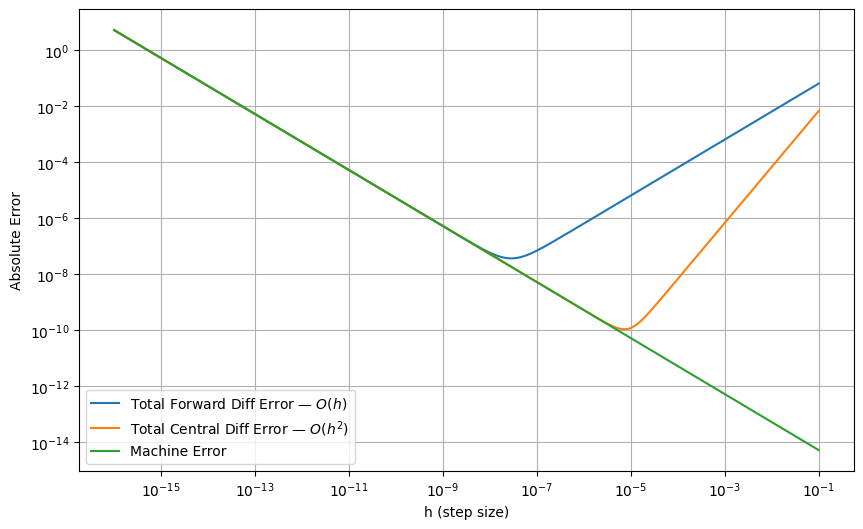

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return np.exp(np.sin(x))

def df1(x):
    return np.exp(np.sin(x)) * np.cos(x)

def df2(x):
    return np.exp(np.sin(x)) * np.cos(x)**2 - np.exp(np.sin(x)) * np.sin(x)

def df3(x):
    return (np.exp(np.sin(x)) * np.cos(x) * (np.cos(x)**2 - 3*np.sin(x) - 1))

def forward_diff(df2, x, h):
    return (h*df2(x)) / 2

def central_diff(df3, x, h):
    return (h**2 * df3(x)) / 6

x0 = 1

eps_machine = np.finfo(float).eps
#eps_machine = np.finfo(np.float32).eps

h_vals = np.logspace(-16, -1, 1000)

total_error_forward = []
total_error_central = []
machine_error = []

for h in h_vals:
    error_machine = np.abs(f(x0))*(eps_machine/h)
    machine_error.append(error_machine)
    total_error_forward.append(np.abs(forward_diff(df2, x0, h)) + error_machine)
    total_error_central.append(np.abs(central_diff(df3, x0, h)) + error_machine)

plt.figure(figsize=(10, 6))
plt.loglog(h_vals, total_error_forward, label='Total Forward Diff Error — $O(h)$')
plt.loglog(h_vals, total_error_central, label='Total Central Diff Error — $O(h^2)$')
plt.loglog(h_vals, machine_error, label='Machine Error')
plt.xlabel("h (step size)")
plt.ylabel("Absolute Error")
plt.grid()
plt.legend()
plt.show()


## Problem 2 <br> Lotka-Volterra prey-predator problem
A classical model that models population of prey and predators in a given ecosystem are the Lotka-Volterra equations. This is a coupled set of two differential equations, given by <br><br>
$
\frac{dx}{dt} = \alpha x - \beta xy
$

$
\frac{dy}{dt} = \delta xy - \gamma y
$

where x and y correspond to the number of preys (auka, grobis) and the number of predators (plėšrūnas), respectively. The constant α corresponds to the growth rate of the preys, β is the predation rate, θ the growth rate of predators per prey eaten and γ the predator death rate

In [24]:
import numpy as np

alpha = 1.1
beta = 0.5
delta = 0.1
gamma = 0.3

def lotka_volterra(t, z):
    x, y = z
    dxdt = alpha*x - beta*x*y
    dydt = delta*x*y - gamma*y
    return [dxdt, dydt]



1. Find the equilibrium points of the system and study their stability

Equilibria: x(t) = xe, where f(xe) = 0 <br>
    - unstable: nearby trajectories move away<br>
    - stable: nearby trajectories move closer (or at least don't move away)


In [ ]:
# alpha*x - beta*x*y = 0; x = 0; y = alpha/beta
# delta*x*y - gamma*y = 0; x = gamma/delta; y = 0
def eqp(alpha, beta, delta, gamma):
    return [(0, 0), (alpha/beta, gamma/delta)]

eq_points = eqp(alpha, beta, delta, gamma)
print(eq_points)

def jacobian(x, y, alpha, beta, delta, gamma):
    return np.array([[alpha - beta*y, -beta*x],
                     [delta*y, delta*x - gamma]])

def eigvals(J):
    a, b = J[0, 0], J[0, 1]
    c, d = J[1, 0], J[1, 1]
    return  [((a+d) + np.sqrt((a+d)**2 - 4*(a*d-b*c))) / 2,
              ((a+d) - np.sqrt((a+d)**2 - 4*(a*d-b*c))) / 2]

def stability():
    for x_eq, y_eq in eq_points:
        J = jacobian(x_eq, y_eq, alpha, beta, delta, gamma)
        #print(J)
        eigenvalues = eigvals(J)
        eigenvalues2 = np.linalg.eig(J)[0]
        print(eigenvalues, eigenvalues2)
        if np.all(np.real(eigenvalues) < 0):
            stability_type = "Stable"
        elif np.all(np.real(eigenvalues) > 0):
            stability_type = "Unstable"
        else:
            stability_type = "Saddle Point"
        print(f"Equilibrium point ({x_eq}, {y_eq}): {stability_type}")
stability()

[(0, 0), (2.2, 3.0)]
[np.float64(1.1), np.float64(-0.30000000000000004)] [ 1.1 -0.3]
Equilibrium point (0, 0): Saddle Point
[np.float64(nan), np.float64(nan)] [-0.24+0.55172457j -0.24-0.55172457j]
Equilibrium point (2.2, 3.0): Saddle Point


C:\Users\Laptop\AppData\Local\Temp\ipykernel_20280\2170524547.py:16: RuntimeWarning: invalid value encountered in sqrt
  return  [((a+d) + np.sqrt((a+d)**2 - 4*(a*d-b*c))) / 2,
C:\Users\Laptop\AppData\Local\Temp\ipykernel_20280\2170524547.py:17: RuntimeWarning: invalid value encountered in sqrt
  ((a+d) - np.sqrt((a+d)**2 - 4*(a*d-b*c))) / 2]


2. Plot the phase space of the system, i.e., plot x vs y, for different configurations

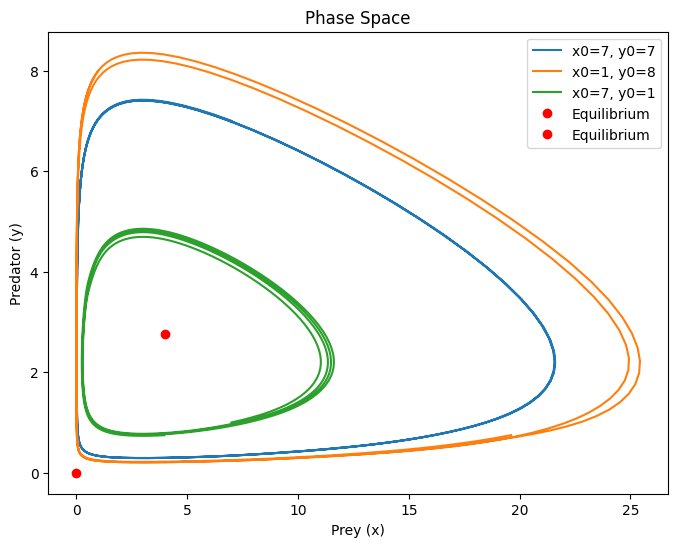

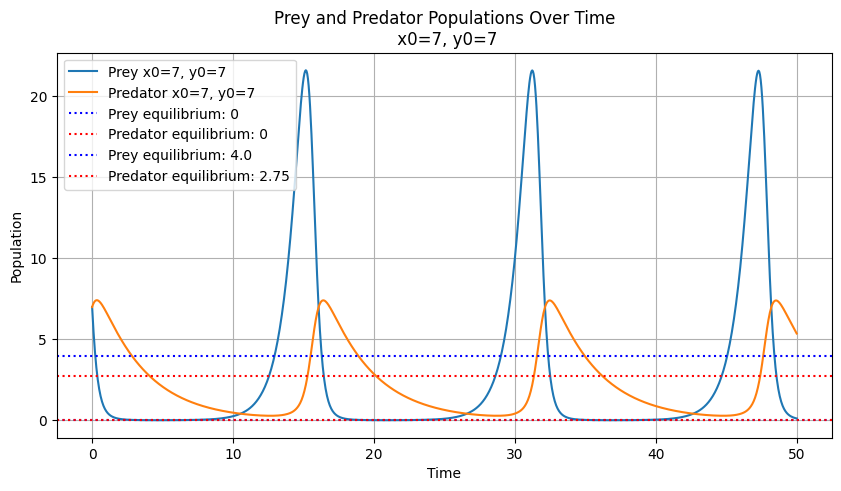

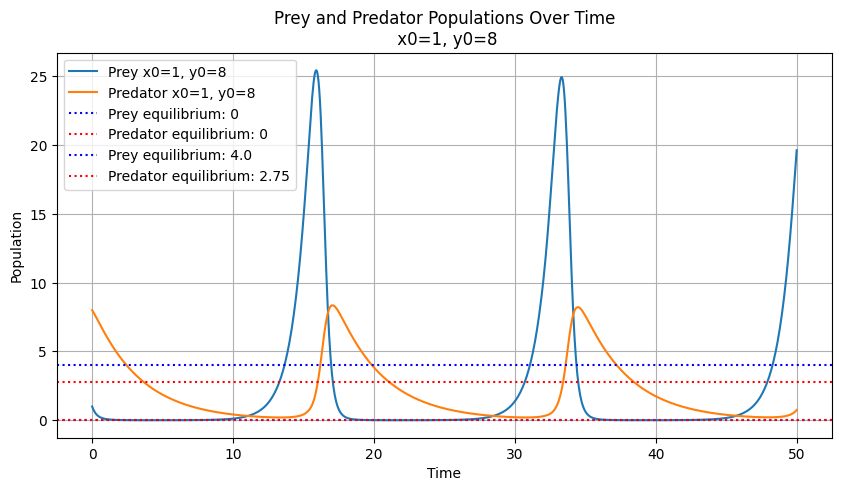

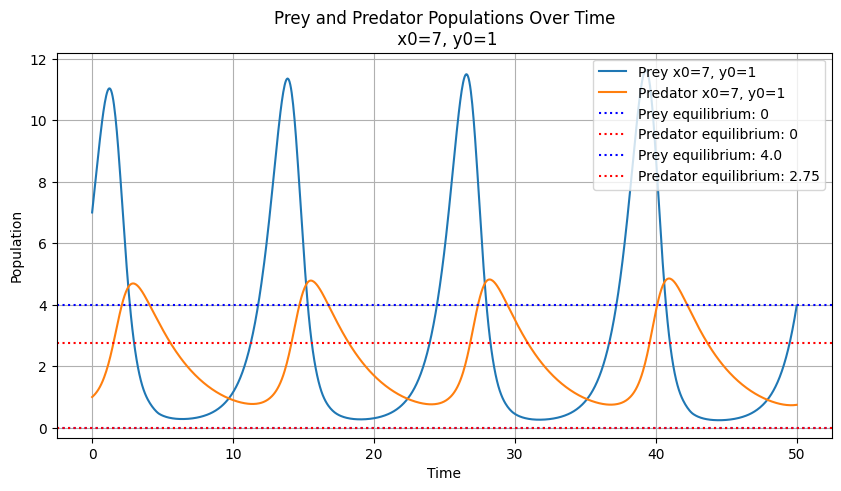

In [ ]:
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

t_span = (0, 50)
t_eval = np.linspace(*t_span, 1000)

initial_conditions = [
    (7, 7),
    (1, 8),
    (7, 1)
]

plt.figure(figsize=(8, 6))
for x0, y0 in initial_conditions:
    sol = solve_ivp(lotka_volterra, t_span, [x0, y0], t_eval=t_eval)
    plt.plot(sol.y[0], sol.y[1], label=f'x0={x0}, y0={y0}')

for x_eq, y_eq in eq_points:
    plt.plot(x_eq, y_eq, 'ro', label='Equilibrium')
plt.xlabel('Prey (x)')
plt.ylabel('Predator (y)')
plt.title('Phase Space')
plt.legend()

for x0, y0 in initial_conditions:
    sol = solve_ivp(lotka_volterra, t_span, [x0, y0], t_eval=t_eval)
    plt.figure(figsize=(10, 5))
    plt.plot(t_eval, sol.y[0], label=f'Prey x0={x0}, y0={y0}')
    plt.plot(t_eval, sol.y[1], label=f'Predator x0={x0}, y0={y0}')
    for x_eq, y_eq in eq_points:
        plt.axhline(y=x_eq, color='blue', linestyle=':', label=f'Prey equilibrium: {x_eq}')
        plt.axhline(y=y_eq, color='red', linestyle=':', label=f'Predator equilibrium: {y_eq}')
    plt.xlabel('Time')
    plt.ylabel('Population')
    plt.title(f'Prey and Predator Populations Over Time\n x0={x0}, y0={y0}')
    plt.legend()
    plt.grid()
    plt.show()


3. Plots with different 
$
\alpha , \beta , \delta , \gamma
$
values

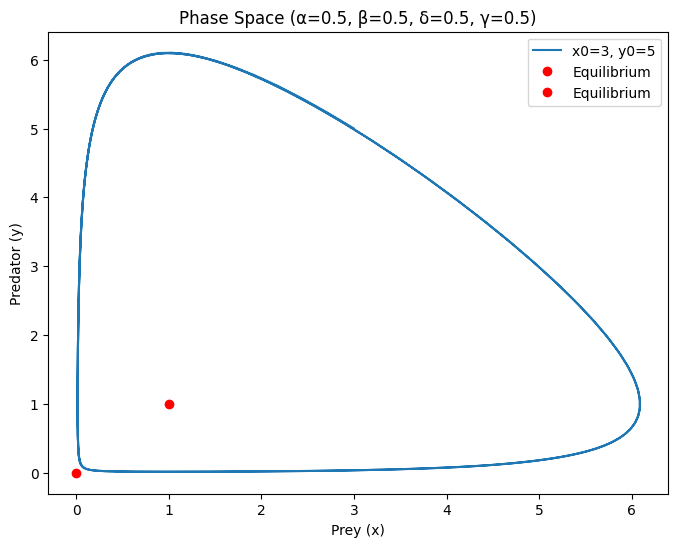

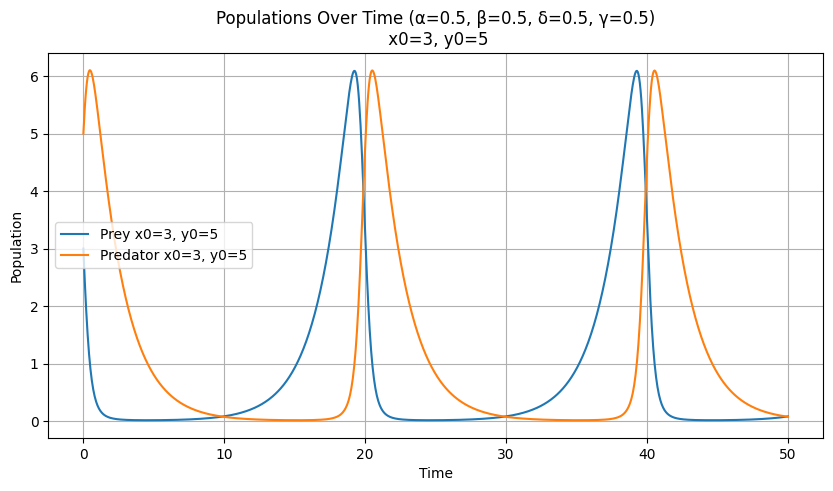

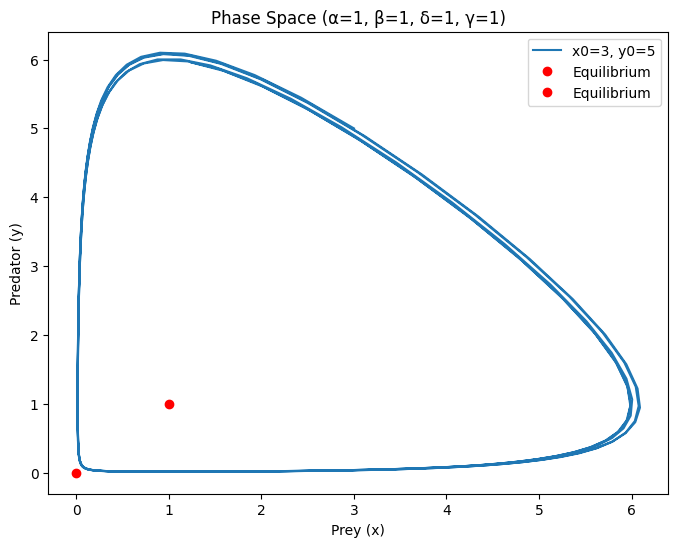

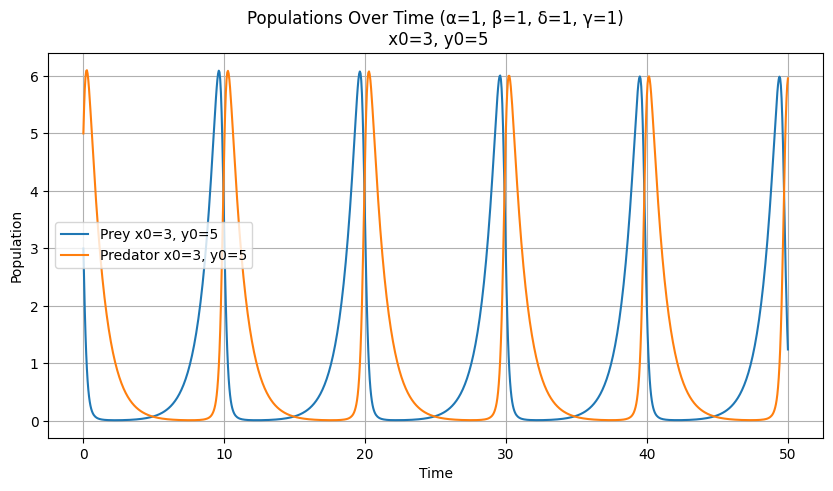

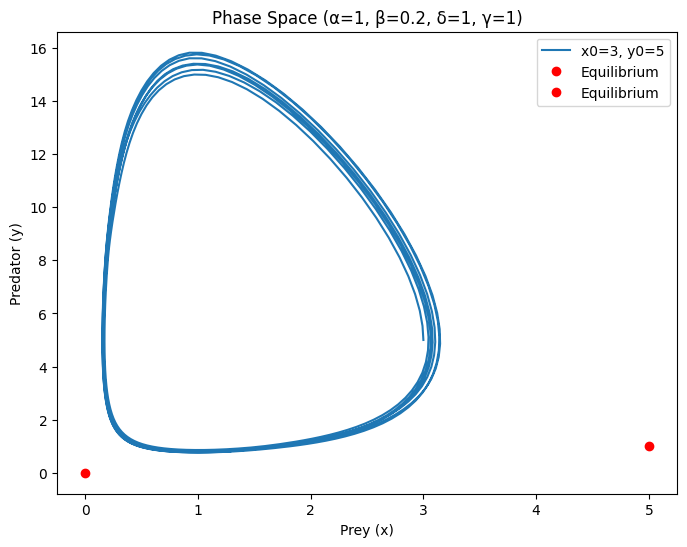

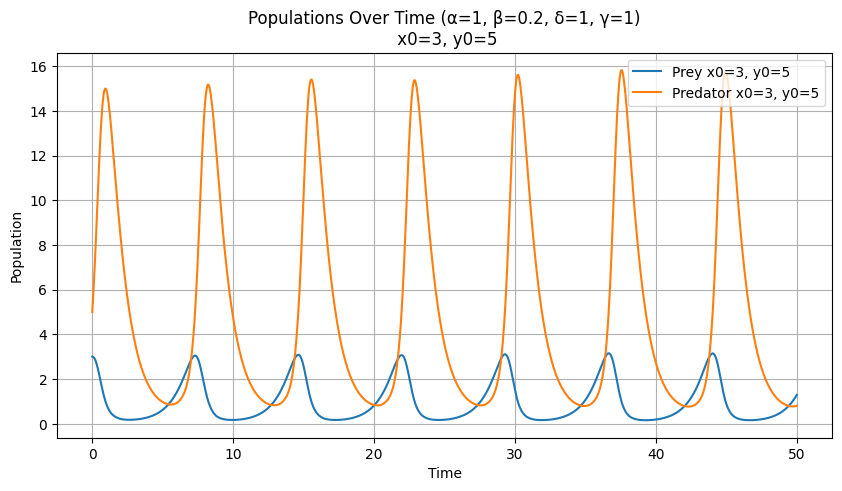

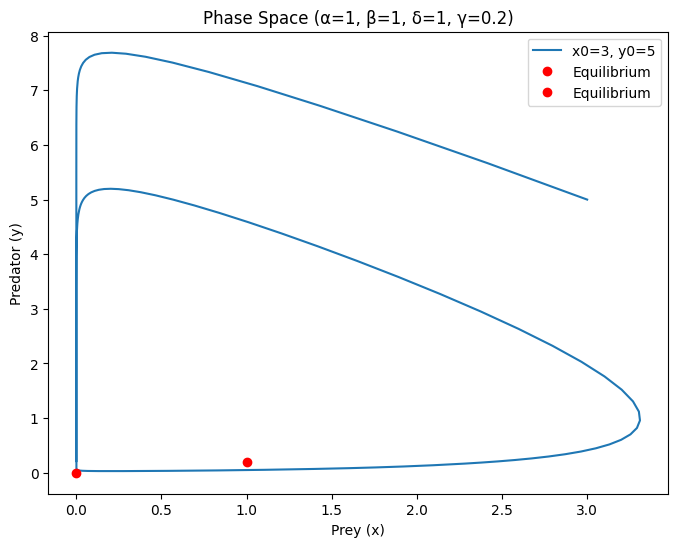

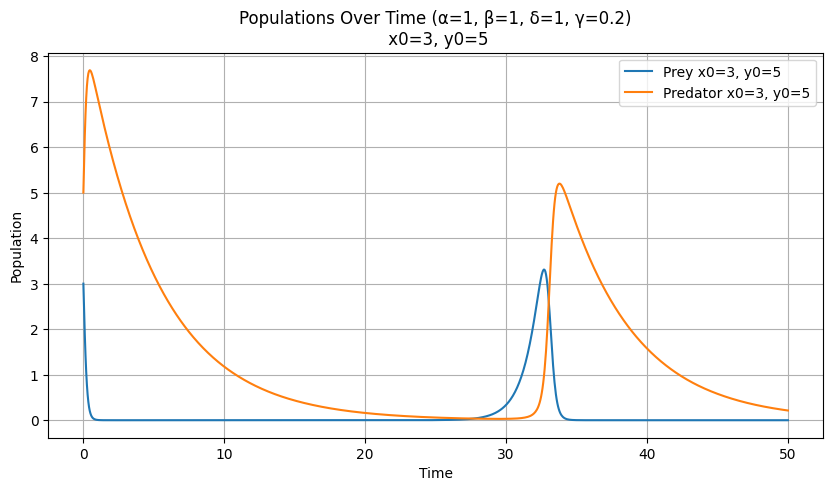

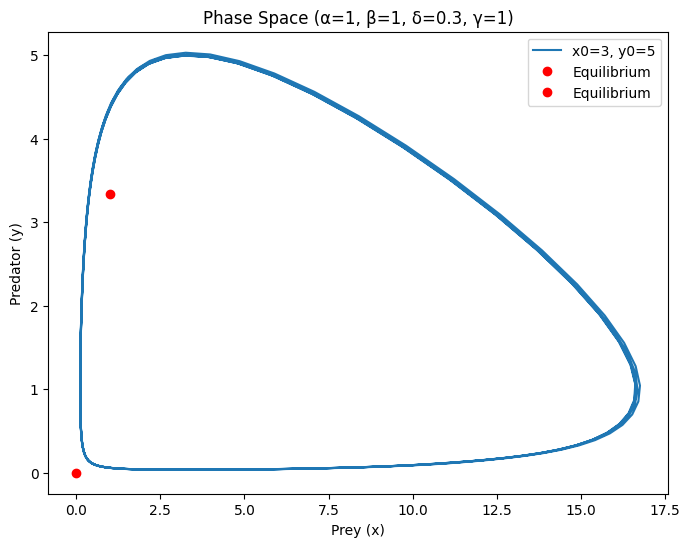

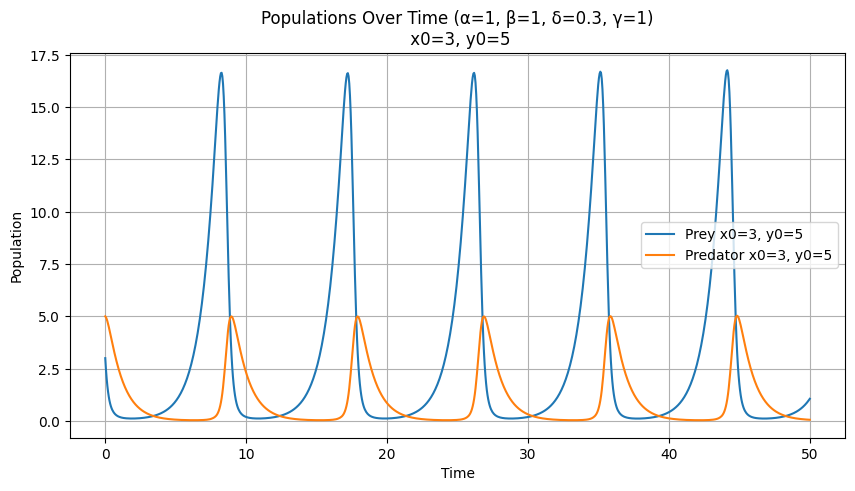

In [63]:

values = [
    {"alpha": 0.5, "beta": 0.5, "delta": 0.5, "gamma": 0.5},
    {"alpha": 1, "beta": 1, "delta": 1, "gamma": 1},
    {"alpha": 1, "beta": 0.2, "delta": 1, "gamma": 1},
    {"alpha": 1, "beta": 1, "delta": 1, "gamma": 0.2},
    {"alpha": 1, "beta": 1, "delta": 0.3, "gamma": 1},
]

for params in values:
    alpha, beta, delta, gamma = params["alpha"], params["beta"], params["delta"], params["gamma"]

    eq_points = eqp(alpha, beta, delta, gamma)

    t_span = (0, 50)
    t_eval = np.linspace(*t_span, 1000)
    x0 = 3
    y0 = 5

    plt.figure(figsize=(8, 6))
    sol = solve_ivp(lotka_volterra, t_span, [x0, y0], t_eval=t_eval)
    plt.plot(sol.y[0], sol.y[1], label=f'x0={x0}, y0={y0}')
    for x_eq, y_eq in eq_points:
        plt.plot(x_eq, y_eq, 'ro', label='Equilibrium')
    plt.xlabel('Prey (x)')
    plt.ylabel('Predator (y)')
    plt.title(f'Phase Space (α={alpha}, β={beta}, δ={delta}, γ={gamma})')
    plt.legend()
    plt.show()

    sol = solve_ivp(lotka_volterra, t_span, [x0, y0], t_eval=t_eval)
    plt.figure(figsize=(10, 5))
    plt.plot(t_eval, sol.y[0], label=f'Prey x0={x0}, y0={y0}')
    plt.plot(t_eval, sol.y[1], label=f'Predator x0={x0}, y0={y0}')
    plt.xlabel('Time')
    plt.ylabel('Population')
    plt.title(f'Populations Over Time (α={alpha}, β={beta}, δ={delta}, γ={gamma})\n x0={x0}, y0={y0}')
    plt.legend()
    plt.grid()
    plt.show()

4. Three species chain

Equilibrium point (0, 0, 0): Saddle Point
Equilibrium point (0.23809523809523808, 0.09523809523809523, 0.9523809523809523): Saddle Point
Equilibrium point (4.999999999999999, 0.09523809523809523, 0): Unstable


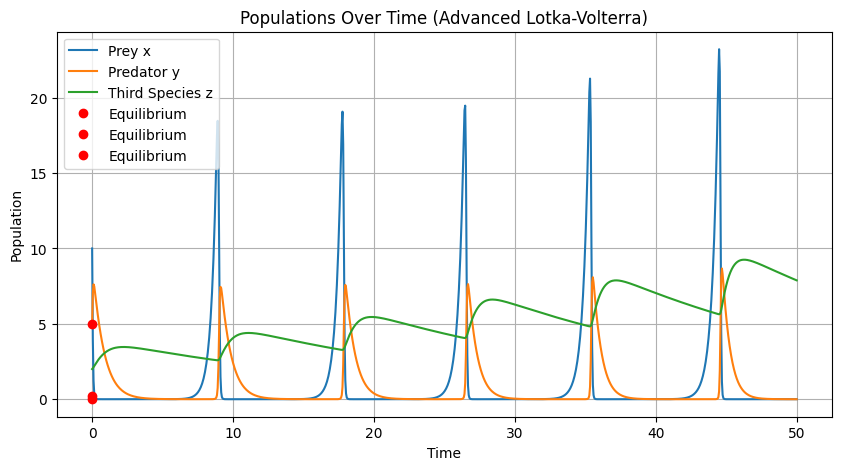

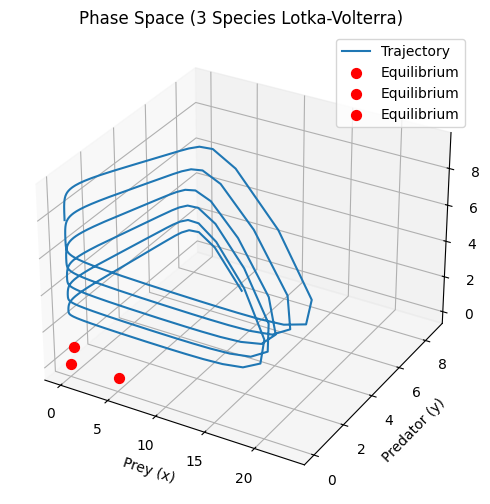

In [103]:
from mpl_toolkits.mplot3d import Axes3D

a = 3.0
b = 3.5
c = 0.1
d = 1.0
e = 1.2
f = 0.1
g = 0.05
h = 0.1

def advanced_lotka_volterra(t, vals):
    x, y, z = vals
    dxdt = a*x - b*x*y - c*x*z
    dydt = e*x*y - d*y - f*z*y
    dzdt = h*y*z - g*z
    return [dxdt, dydt, dzdt]

def advanced_eqp(a, b, c, d, e, f, g, h):
    return [
        (0, 0, 0),
        (d/(e*b), (a*c + d*f)/(e*b), (a*c + d*f)/(e*b*h)),
        (g/(h*f), (a*c + d*f)/(e*b), 0)
    ]
def advanced_stability(a, b, c, d, e, f, g, h):
    eq_points = advanced_eqp(a, b, c, d, e, f, g, h)
    for x_eq, y_eq, z_eq in eq_points:
        J = np.array([[a - b*y_eq - c*z_eq, -b*x_eq, -c*x_eq],
                      [e*y_eq, e*x_eq - d - f*z_eq, -f*y_eq],
                      [h*z_eq, h*y_eq, h*x_eq - g]])
        eigenvalues = np.linalg.eigvals(J)
        if np.all(np.real(eigenvalues) < 0):
            stability_type = "Stable"
        elif np.all(np.real(eigenvalues) > 0):
            stability_type = "Unstable"
        else:
            stability_type = "Saddle Point"
        print(f"Equilibrium point ({x_eq}, {y_eq}, {z_eq}): {stability_type}")

advanced_stability(a, b, c, d, e, f, g, h)

t_span = (0, 50)
t_eval = np.linspace(*t_span, 1000)
x0 = [10, 5, 2]

sol = solve_ivp(advanced_lotka_volterra, t_span, x0, t_eval=t_eval)
plt.figure(figsize=(10, 5))
plt.plot(t_eval, sol.y[0], label='Prey x')
plt.plot(t_eval, sol.y[1], label='Predator y')
plt.plot(t_eval, sol.y[2], label='Third Species z')
for idx, (x_eq, y_eq, z_eq) in enumerate(advanced_eqp(a, b, c, d, e, f, g, h)):
    plt.plot([t_eval[0]], [x_eq], 'ro', label='Equilibrium')

plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Populations Over Time (Advanced Lotka-Volterra)')
plt.legend()
plt.grid()

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot(sol.y[0], sol.y[1], sol.y[2], label='Trajectory')
for x_eq, y_eq, z_eq in advanced_eqp(a, b, c, d, e, f, g, h):
    ax.scatter(x_eq, y_eq, z_eq, color='red', s=50, label='Equilibrium')
ax.set_xlabel('Prey (x)')
ax.set_ylabel('Predator (y)')
ax.set_zlabel('Third Species (z)')
ax.set_title('Phase Space (3 Species Lotka-Volterra)')
ax.legend()
plt.show()
